El objetivo de este notebook es hacer una implementación rápida de un Decision Tree y ganar intuición sobre la forma de tomar las decisiones.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/My Drive/repo_tesis/entorno_tesis_Molina"
!source bin/activate

Mounted at /content/drive
/content/drive/My Drive/repo_tesis/entorno_tesis_Molina


In [2]:
import numpy as np
import joblib
import sys
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
# Importar los datos
features = joblib.load("/content/drive/My Drive/repo_tesis/data/FEATURES_W200_I50.joblib")
label = joblib.load("/content/drive/My Drive/repo_tesis/data/label_W200_I50.joblib")

features_array = np.array(features)
label_array = np.array(label)

In [ ]:
%cd "/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/particiones_1subTest"

prepro_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

grilla_C = [0.1, 1]

metricas_grilla = []

for k in range(len(grilla_C)):  # acá decido qué valor tiene el hiperparámetro

  metricas = []
  for i in range(0, 1): # acá decido qué sujeto saco para test
    print(i)
    # Importo particiones
    folds_ind = joblib.load('folds_W200_I50_sujetoTest_' + str(i+1) + '.pkl')
    sujetos_array = joblib.load('arraySujetos_folds_W200_I50_sujetoTest_' + str(i+1) + '.pkl')

    # por convencion, se que el primer fold es para test, asi que lo saco
    fold_test = folds_ind[0]

    # ahora lo quito para no armar entrevero
    folds_ind = folds_ind[1:]

    # voy a hacer cross validation a mano
    # defino los folds que tengo, voy a ir dejando en validacion de a 1
    num_folds = np.arange(0, 9)   # no importa que no coincida con el sujeto, es solo para recorrer cada fold, al final me puedo fijar a qué sujeto pertenecía

    precision_train = []
    accuracy_train = []
    recall_train = []
    precision_val = []
    accuracy_val = []
    recall_val = []

    for ind_fold_val in num_folds:  # acá itero para hacer la CV: en cada iteración dejo un fold de validación fuera

      folds_ind_train = folds_ind.copy()
      folds_ind_train.pop(ind_fold_val)
      fold_ind_val = folds_ind[ind_fold_val]

      # concateno los arrays en uno solo
      folds_ind_train_array = np.concatenate(folds_ind_train)

      # aplanar el array resultante
      folds_ind_train_array = folds_ind_train_array.ravel()

      # concateno los arrays en uno solo
      fold_ind_val_array = np.array(fold_ind_val)

      # Defino X_train, y_train, X_val, y_val
      X_train = features_array[folds_ind_train_array, :]
      y_train = label_array[folds_ind_train_array, 1]

      X_val = features_array[fold_ind_val_array, :]
      y_val = label_array[fold_ind_val_array, 1]

      X_train = prepro_pipeline.fit_transform(X_train)
      X_val = prepro_pipeline.transform(X_val)

      # ajusto el modelo con los datos de entrenamiento
      modelo = SVC(kernel='linear', random_state=42, C=grilla_C[k])
      modelo.fit(X_train, y_train)

      # calculo las predicciones sobre los datos de train y val
      y_pred_train = modelo.predict(X_train)
      y_pred_val = modelo.predict(X_val)


      # calculo metricas sobre conjunto de train y val
      precision_train.append(precision_score(y_train, y_pred_train, average='weighted'))
      precision_val.append(precision_score(y_val, y_pred_val, average='weighted'))
      accuracy_train.append(accuracy_score(y_train, y_pred_train))
      accuracy_val.append(accuracy_score(y_val, y_pred_val))
      recall_train.append(recall_score(y_train, y_pred_train, average='weighted'))
      recall_val.append(recall_score(y_val, y_pred_val, average='weighted'))

      print(accuracy_val)

    metricas.append([precision_train, accuracy_train, recall_train, precision_val, accuracy_val, recall_val])
    print(accuracy_val)
  metricas_grilla.append(metricas)

joblib.dump(metricas_grilla, 'metricas_grilla_svm.pkl')



/content/drive/My Drive/repo_tesis/src/ronda_experimentos_1/particiones_1subTest
0
[0.31662349535273504]
[0.31662349535273504, 0.3205474518278408]
[0.31662349535273504, 0.3205474518278408, 0.3860431654676259]
[0.31662349535273504, 0.3205474518278408, 0.3860431654676259, 0.3607945796119495]


KeyboardInterrupt: 

[0.5575272031914864, 0.551623545316745, 0.556390862532439, 0.5254038227939237, 0.5692832875435229, 0.5663902067493676, 0.5626264590778004, 0.5689633869024983, 0.5421035944412438]


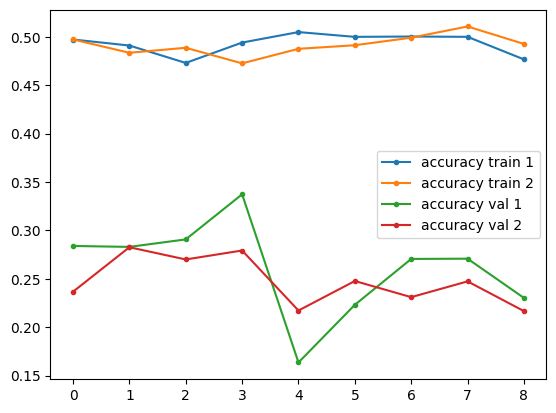

In [ ]:
# print(metricas[0][0])

# Grafico de las metricas
plt.figure()
plt.plot(metricas[0][1], '.-')
plt.plot(metricas[1][1], '.-')

plt.plot(metricas[0][4], '.-')
plt.plot(metricas[1][4], '.-')

plt.legend(['accuracy train 1', 'accuracy train 2', 'accuracy val 1', 'accuracy val 2'])

In [ ]:
folds_ind = joblib.load('folds_W200_I50_sujetoTest_' + str(1) + '.pkl')
sujetos_array = joblib.load('arraySujetos_folds_W200_I50_sujetoTest_' + str(2) + '.pkl')

print(folds_ind)

[array([], dtype=int64), array([   0,    1,    2, ..., 5555, 5556, 5557]), array([ 5558,  5559,  5560, ..., 12118, 12119, 12120]), array([12121, 12122, 12123, ..., 17671, 17672, 17673]), array([17674, 17675, 17676, ..., 24621, 24622, 24623]), array([24624, 24625, 24626, ..., 31115, 31116, 31117]), array([31118, 31119, 31120, ..., 37990, 37991, 37992]), array([37993, 37994, 37995, ..., 44782, 44783, 44784]), array([44785, 44786, 44787, ..., 51319, 51320, 51321]), array([51322, 51323, 51324, ..., 57842, 57843, 57844])]
